<a href="https://colab.research.google.com/github/Jovania/Projetos-01/blob/master/Classificador_KNNcustom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Criando um Classificardor KNN do zero**


** K-nearest neighboors – KNN**

A ideia principal do KNN é determinar o rótulo de classificação de uma amostra baseado nas amostras vizinhas advindas de um conjunto de treinamento. 

A variável "k" representa a quantidade de vizinhos mais próximos que serão utilizados para averiguar de qual classe a nova amostra pertence. 


É fácil de implementar, porém percorre todos k vizinhos para identificar o mais próximo, com isso tem custo computacional

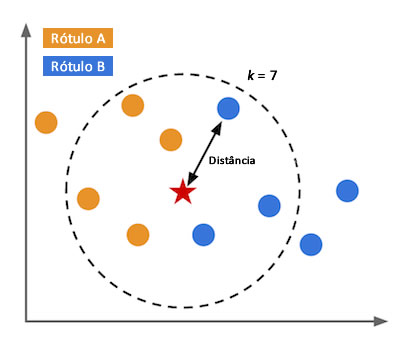

In [4]:
from scipy.spatial import distance
from sklearn import datasets
from sklearn import datasets

# Utilizando a distancia Euclidiana

In [5]:
class customKNNEuclidiano():
    # here, we memorize the dataset into our class
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    # here, we predict the targets
    def predict(self, X_test):
        predictions = []

        for row in X_test:
            label = self.closest(row) #pega o elemento mais próximo
            predictions.append(label)

        return predictions

    # here, we calculate the nearest neighbors using euclidean distance between two points
    def closest(self, row):
        best_dist = distance.euclidean(row, self.X_train[0])
        best_index = 0

        for i in range(1, len(self.X_train)):
            dist = distance.euclidean(row, self.X_train[i])

            if dist < best_dist:
                best_dist = dist
                best_index = i

        return self.y_train[best_index]

In [6]:
iris = datasets.load_iris()

# put the data and targets as X and y to simulate a function
X = iris.data
y = iris.target

# partition the data as train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .5)

# K-Nearest Neighbors Classifier
clf_KNNcustom = customKNNEuclidiano()

# fit a curve using customKNNEuclidiano
clf_KNNcustom.fit(X_train, y_train)

# predict the target on given test data using customKNNEuclidiano
clf_predictions = clf_KNNcustom.predict(X_test)

# display accuracy score or confidence factor
from sklearn.metrics import accuracy_score
print("Accuracy Score using our customKNN : %s" % accuracy_score(y_test, clf_predictions))


Accuracy Score using our customKNN : 0.96
